# Classification of Time-Series Images Using Deep Convolutional Neural Networks

In [3]:
from PIL import Image
import numpy as np
import os
import cv2

In [17]:
data=[]
labels=[]
Goods=os.listdir("C:\\Users\\91979\\Desktop\\Images\\Good")
for Good in Goods:
    imag=cv2.imread("C:\\Users\\91979\\Desktop\\Images\\Good\\"+Good)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(0)
Bads=os.listdir("C:\\Users\\91979\\Desktop\\Images\\Bad")
for Bad in Bads:
    imag=cv2.imread("C:\\Users\\91979\\Desktop\\Images\\Bad\\"+Bad)
    img_from_ar = Image.fromarray(imag, 'RGB')
    resized_image = img_from_ar.resize((50, 50))
    data.append(np.array(resized_image))
    labels.append(1)

In [18]:
sensors=np.array(data)
labels=np.array(labels)

In [19]:
np.save("sensors",sensors)
np.save("labels",labels)

In [20]:
sensors=np.load("sensors.npy")
labels=np.load("labels.npy")

In [21]:
s=np.arange(sensors.shape[0])
np.random.shuffle(s)
sensors=sensors[s]
labels=labels[s]

In [22]:
num_classes=len(np.unique(labels))
data_length=len(sensors)

In [23]:
(x_train,x_test)=sensors[(int)(0.3*data_length):],sensors[:(int)(0.3*data_length)]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
train_length=len(x_train)
test_length=len(x_test)

In [24]:
data_length

20

In [25]:
(y_train,y_test)=labels[(int)(0.3*data_length):],labels[:(int)(0.3*data_length)]

In [26]:
import keras
from keras.utils import np_utils
#One hot encoding
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [28]:
(y_train_a,y_test_a)=labels[(int)(0.3*data_length):],labels[:(int)(0.3*data_length)]

In [29]:
# import sequential model and all the required layers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#make model
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(50,50,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        2080      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        8256      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)         

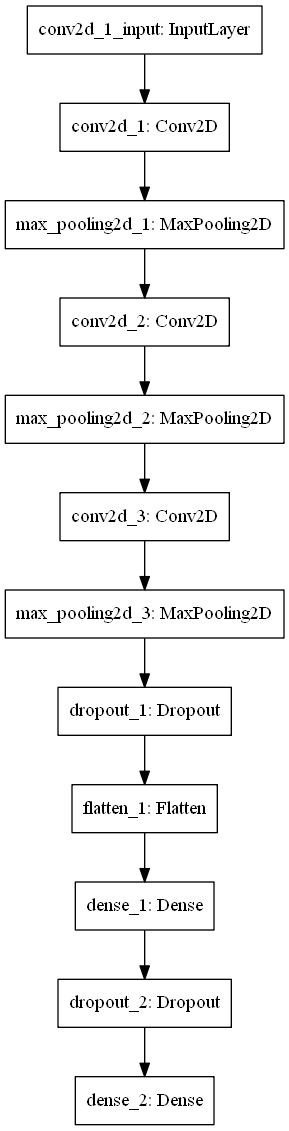

In [32]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [33]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])

In [34]:
model.fit(x_train,y_train,batch_size=1024,epochs=10,verbose=1)

Epoch 1/10
12/12 [==============================] - 0s 1ms/step - loss: 2.4239e-05 - accuracy: 1.0000
Epoch 2/10
12/12 [==============================] - 0s 1ms/step - loss: 1.5459e-04 - accuracy: 1.0000
Epoch 3/10
12/12 [==============================] - 0s 2ms/step - loss: 2.1308e-05 - accuracy: 1.0000
Epoch 4/10
12/12 [==============================] - 0s 2ms/step - loss: 7.7772e-05 - accuracy: 1.0000
Epoch 5/10
12/12 [==============================] - 0s 2ms/step - loss: 2.4715e-05 - accuracy: 1.0000
Epoch 6/10
12/12 [==============================] - 0s 2ms/step - loss: 5.5058e-05 - accuracy: 1.0000
Epoch 7/10
12/12 [==============================] - 0s 2ms/step - loss: 5.2708e-05 - accuracy: 1.0000
Epoch 8/10
12/12 [==============================] - 0s 2ms/step - loss: 8.2182e-05 - accuracy: 1.0000
Epoch 9/10
12/12 [==============================] - 0s 2ms/step - loss: 2.4467e-05 - accuracy: 1.0000
Epoch 10/10
12/12 [==============================] - 0s 2ms/step - loss: 1.6020e-0

In [78]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n', 'Test accuracy:', score[1])

245/245 [==============================] - 0s 301us/step

 Test accuracy: 0.7591836452484131


In [114]:
y_pred=model.predict(x_test)

In [116]:
y_pred_bool = np.argmax(y_pred, axis=1)

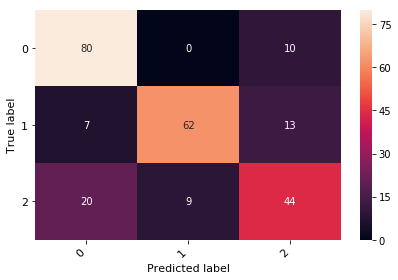

In [119]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
confusion_matrix= confusion_matrix(y_test_a, y_pred_bool)#.argmax(axis=1))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 10}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 11)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 11)
plt.ylabel('True label', fontsize = 11)
plt.xlabel('Predicted label', fontsize = 11)
plt.tight_layout()

In [80]:
def convert_to_array(img):
    im = cv2.imread(img)
    img = Image.fromarray(im, 'RGB')
    image = img.resize((50, 50))
    return np.array(image)
def get_sensor_name(label):
    if label==0:
        return "Good"
    if label==1:
        return "Bad"
    if label==2:
        return "ConsiderateGood"
def predict_sensor(file):
    print("Predicting .................................")
    ar=convert_to_array(file)
    ar=ar/255
    label=1
    a=[]
    a.append(ar)
    a=np.array(a)
    score=model.predict(a,verbose=1)
    print(score)
    label_index=np.argmax(score)
    print(label_index)
    acc=np.max(score)
    sensor=get_sensor_name(label_index)
    print(sensor)
    print("The predicted sensor is a "+sensor+" with accuracy =    "+str(acc))

In [87]:
predict_sensor("C:\\Users\\debby\\PycharmProjects\\Tensorflow\\C\\PI040298AA3I004393.png")

Predicting .................................
1/1 [==============================] - 0s 4ms/step
[[0.20462793 0.06851719 0.7268549 ]]
2
ConsiderateGood
The predicted sensor is a ConsiderateGood with accuracy =    0.7268549
